# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

# 2. Importing data

In [2]:
# Import relationship data

relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,3
...,...,...,...
86,Greece,Italy,2
87,Italy,Japan,6
88,Romania,Russia,6
89,India,Lebanon,2


In [4]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# 3. Graph visualization - Networkx

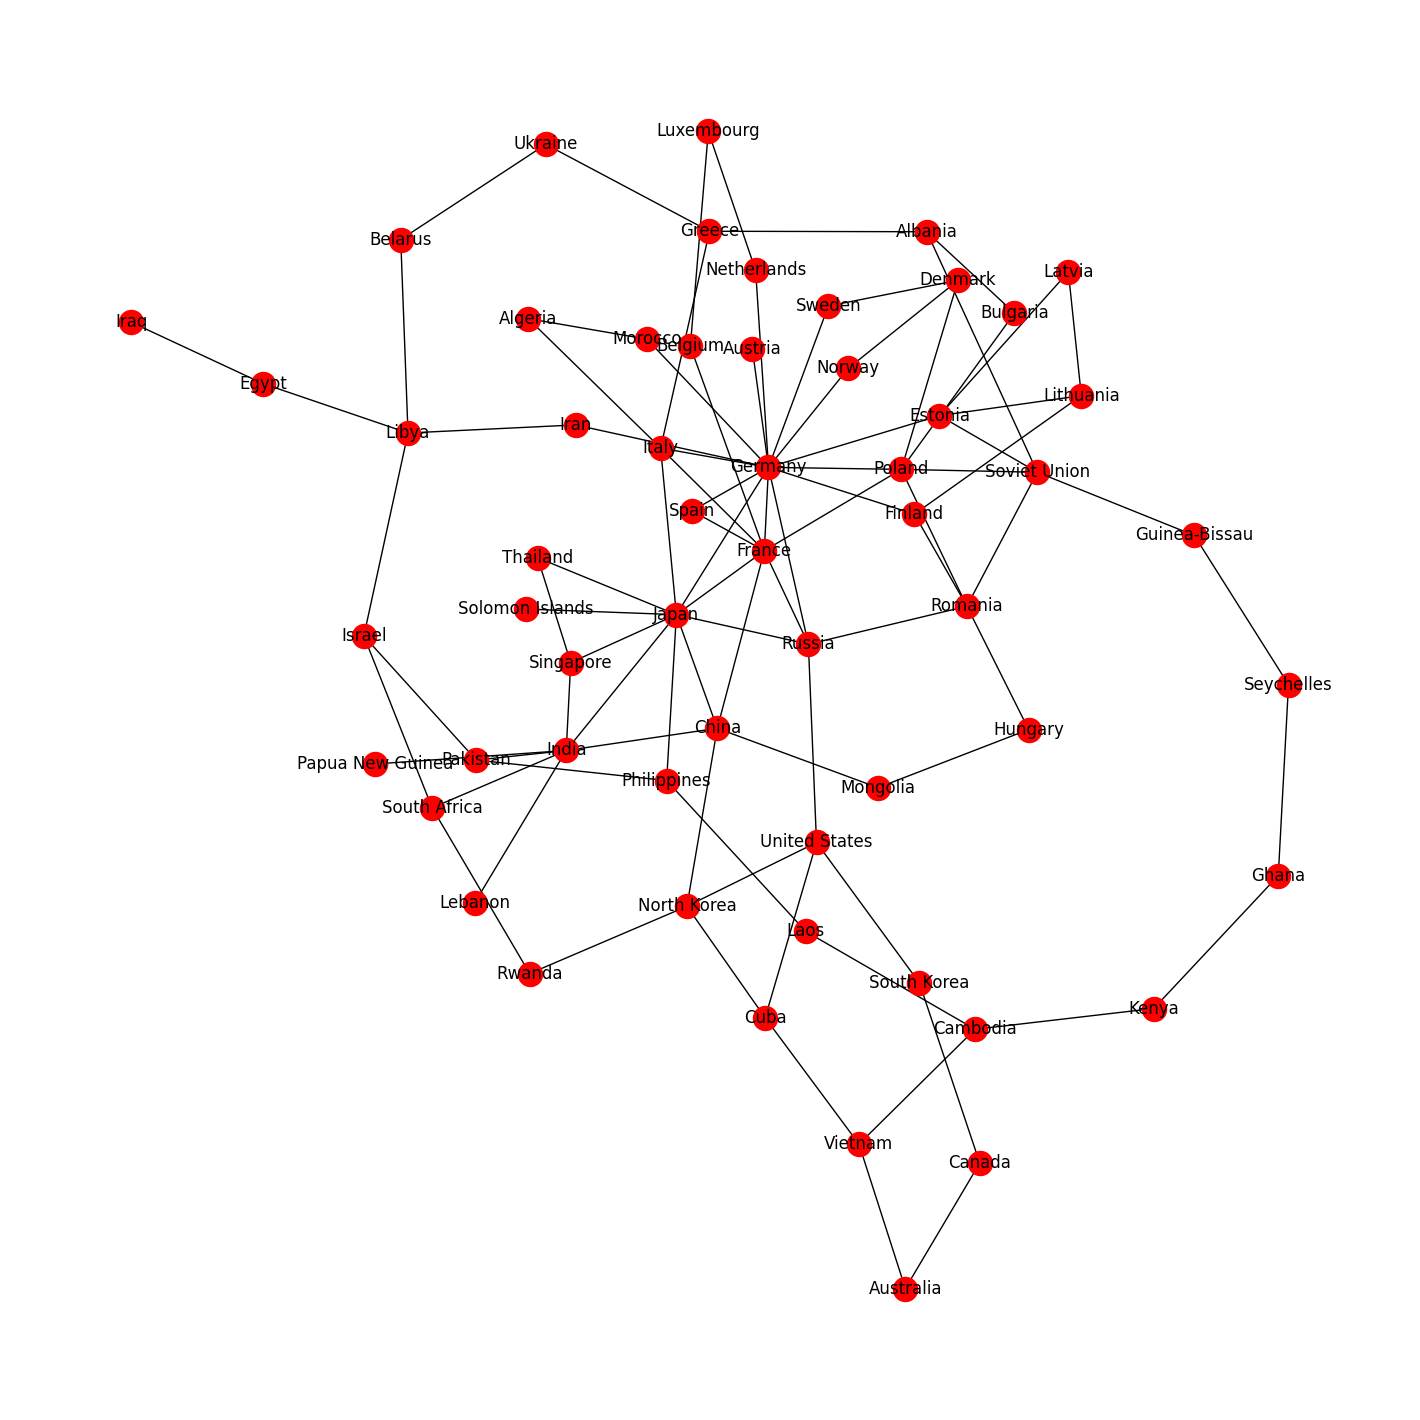

In [9]:
h = plt.figure(figsize = (14,14))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [10]:
h.savefig('networkx_plt_countries.png')

# 4. Graph visualization - Pyvis

In [11]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

countries.html


# 5. Community detection - Leiden algorithm

In [15]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [16]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [17]:
new_com = coms.to_node_community_map()

In [18]:
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Italy': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Japan': [1],
             'China': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Papua New Guinea': [1],
             'Lebanon': [1],
             'Soviet Union': [2],
             'Estonia': [2],
             'Latvia': [2],
             'Lithuania': [2],
             'Finland': [2],
             'Seychelles': 

In [19]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [20]:
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Italy': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Japan': 1,
 'China': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Papua New Guinea': 1,
 'Lebanon': 1,
 'Soviet Union': 2,
 'Estonia': 2,
 'Latvia': 2,
 'Lithuania': 2,
 'Finland': 2,
 'Seychelles': 2,
 'Guinea-Bissau': 2,
 'Romania': 2,
 'Hungary': 2,
 'Mongolia': 2,
 'Albania': 3,
 'Greece': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'Bulgaria': 3,
 'North Korea': 4,
 'Cuba': 4,
 'United States': 4,
 'South Korea': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Rwanda': 4,
 'Laos': 5,
 'Cambodia': 5,
 'Kenya': 5,
 'Ghana': 5}

In [22]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("countries_leiden.html")

countries_leiden.html


This graph is fascinating! I trully love it and I love looking at it and trying to grasp the implications. It roughly makes sense geographically, for example, blue - moslty Central Europe, green - Baltics/Eastern Europe, pink - South Europe, yellow - Asia, purple - Africa, red - Americas. Not always, not exactly, but I think that given how small the data sample was, this is pretty accurate.

# 6. The most important countries

DEGREE

In [23]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.14035087719298245,
 'Russia': 0.08771929824561403,
 'Germany': 0.24561403508771928,
 'Italy': 0.08771929824561403,
 'Austria': 0.017543859649122806,
 'Spain': 0.03508771929824561,
 'Poland': 0.10526315789473684,
 'Soviet Union': 0.08771929824561403,
 'Estonia': 0.07017543859649122,
 'Latvia': 0.03508771929824561,
 'Lithuania': 0.05263157894736842,
 'Finland': 0.05263157894736842,
 'Denmark': 0.05263157894736842,
 'Norway': 0.03508771929824561,
 'Sweden': 0.03508771929824561,
 'Netherlands': 0.03508771929824561,
 'Luxembourg': 0.03508771929824561,
 'Belgium': 0.03508771929824561,
 'Albania': 0.05263157894736842,
 'Greece': 0.05263157894736842,
 'Ukraine': 0.03508771929824561,
 'Belarus': 0.03508771929824561,
 'Libya': 0.07017543859649122,
 'Egypt': 0.03508771929824561,
 'Iraq': 0.017543859649122806,
 'Japan': 0.17543859649122806,
 'Morocco': 0.03508771929824561,
 'Algeria': 0.03508771929824561,
 'China': 0.08771929824561403,
 'Thailand': 0.03508771929824561,
 'Singapore': 0

In [30]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [31]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

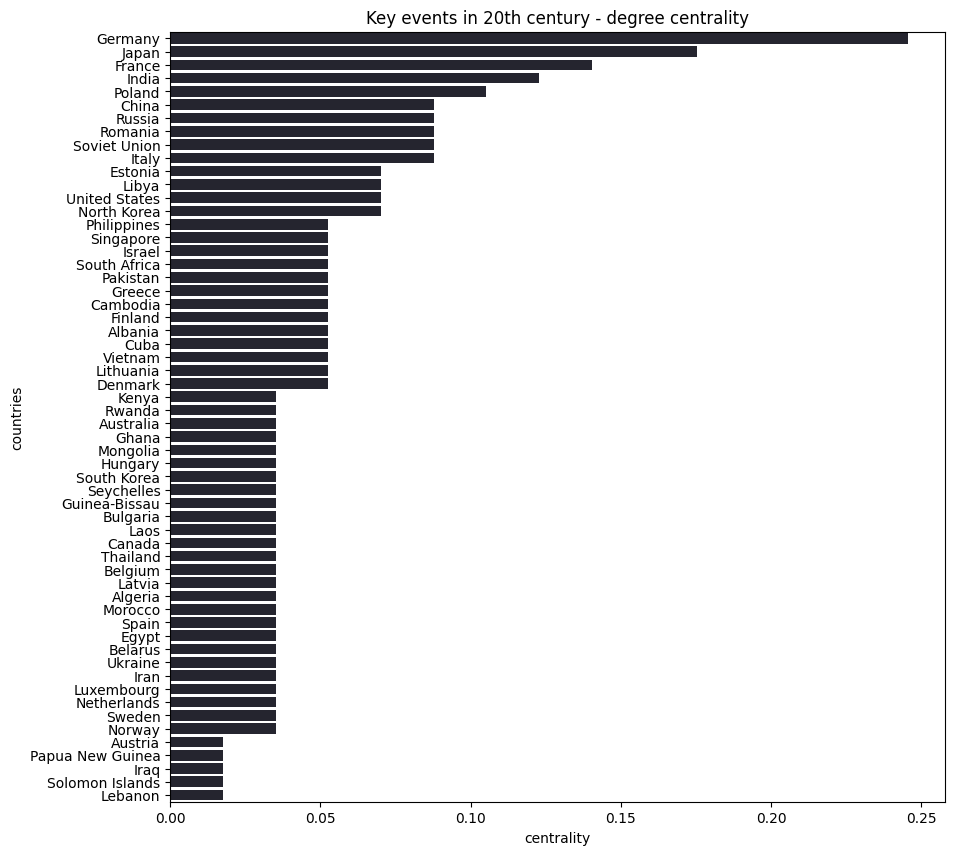

In [32]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("Key events in 20th century - degree centrality")

The degree centrality shows that Germany, Japan, France, India, and Poland have the most connections with other countries in this page. The only somewhat surprising finding that India is so high up, but not United States or Russia/Soviet union. I think US might been featured more if I included "Allies" as one of the nodes. Interesting.

CLOSENESS

In [33]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [34]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

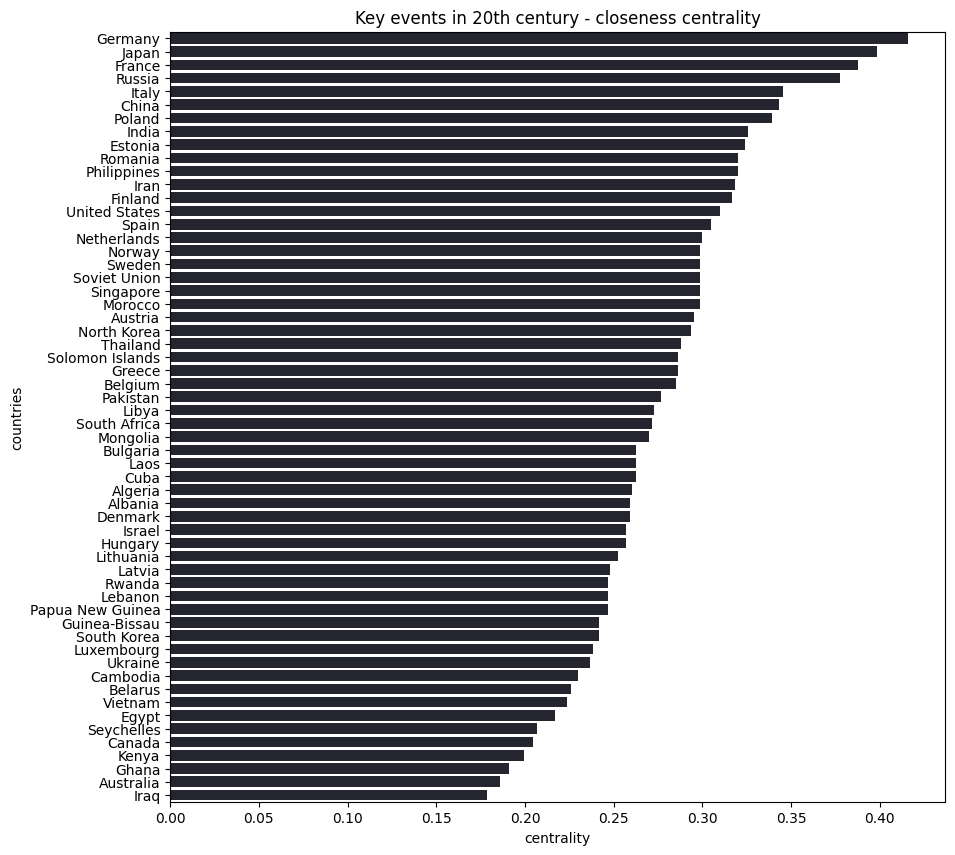

In [36]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("Key events in 20th century - closeness centrality")

Similarly to degree centrality, in the closeness centrality, Germany and Japan are also the top two countries. Closeness centrality calculates the shortest path between nodes, and France and Russia pops up here amongst top 4. This makes a bit more sense to me. Also, I noticed the difference in the shape of the plots, because in the degree centrality difference between Lebanon and Germany was 10 times, whilst in the closeness centrality the difference between Iraq and Germany was only 2 times.

BETWEENNESS

In [37]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [38]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

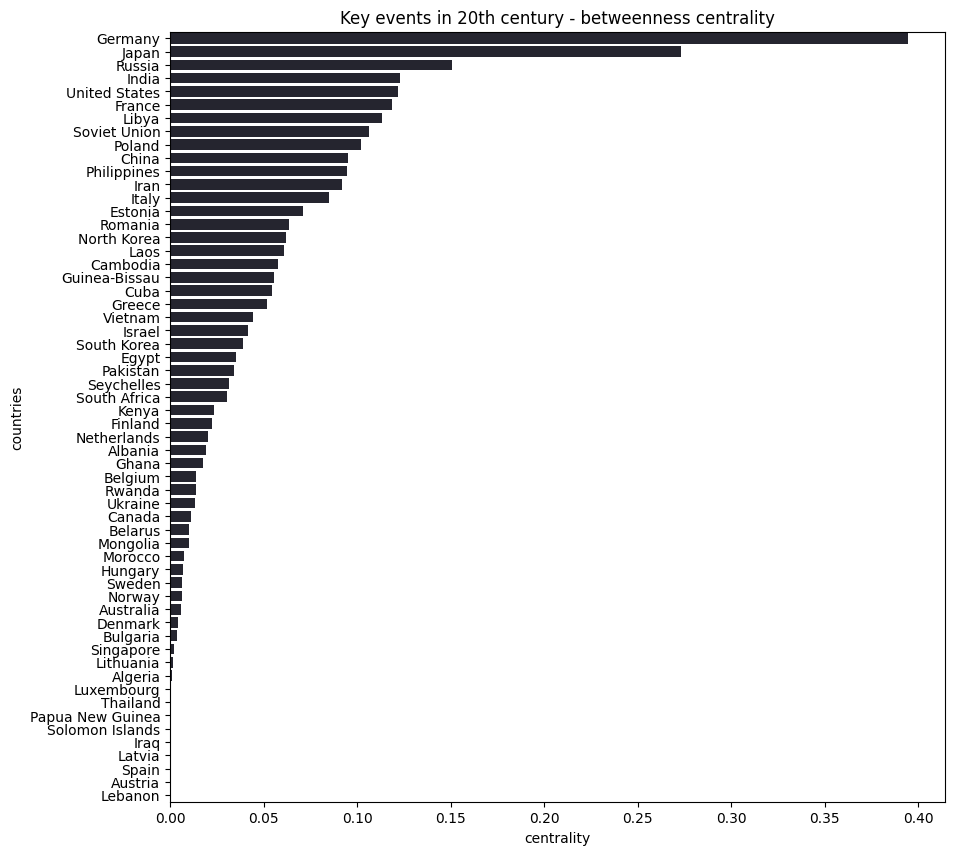

In [40]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("Key events in 20th century - betweenness centrality")

Similarly to previous measures of centrality, the top 2 countries in betweenness measures are Germany and Japan, but now followed by Russia, India, and United States. I think this graph shows most complex relationships between countries, as also indicated by differences in bar sizes. I also like it conceptually, because just because countries have good internal relationship doesn't mean that that relationship is important globaly.

# 7. Saving measures

In [41]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')